<a href="https://colab.research.google.com/github/Himali-Silwadiya/Machine_Learning/blob/main/Copy_of_Perceptron_Model_for_AND_Gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [3]:
class Perceptron:
  def __init__(self, ip, lr, epochs):
    self.w = np.zeros((ip+1,1))
    print (self.w)
    self.lr = lr
    self.epochs = epochs
    self.loss_lst = []

  #It is a step activation function
  def activation(self, z):
    return 1 if z>=0 else 0

  def predict(self, x):
    z = self.w.T.dot(x)
    a = self.activation(z)
    return a

  def fit(self, X, Y):
    for i in range(self.epochs):
      L = 0
      for j in range(Y.shape[0]):
        x = np.insert(X[j], 0, 1)
        x = x.reshape((3,1))
        y = self.predict(x)
        loss = Y[j]-y
        L += loss**2
        self.w += self.lr * loss * x
      L = L/4
      self.loss_lst.append(L)

In [9]:
import numpy as np
if __name__ == '__main__':
  X = np.array([
                [0,0],
                [0,1],
                [1,0],
                [1,1]
  ])
  Y = np.array([0,1,1,0])

  model = Perceptron(ip = 2, lr = 0.001, epochs = 100)
  model.fit(X,Y)
  print(model.w)

[[0.]
 [0.]
 [0.]]
[[ 0.   ]
 [-0.001]
 [ 0.   ]]


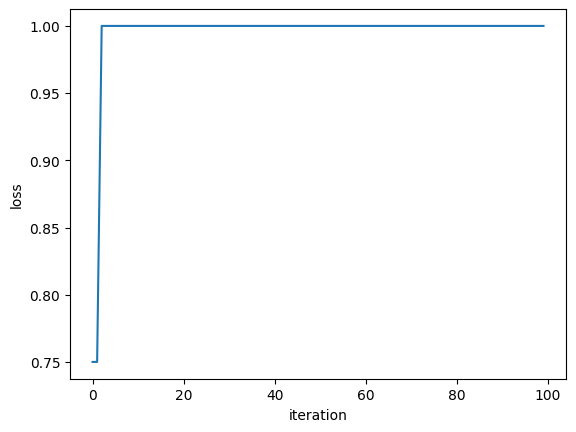

In [11]:
import matplotlib.pyplot as plt
x_axis = [int(x) for x in range(100)]
y_axis = model.loss_lst
plt.plot(x_axis, y_axis)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [10]:
import numpy as np
if __name__ == '__main__':
  X = np.array([
                [0,0],
                [0,1],
                [1,0],
                [1,1]
  ])
  Y = np.array([0,1,1,0])

  model = Perceptron(ip = 2, lr = 0.001, epochs = 100)
  model.fit(X,Y)
  print(model.w)

[[0.]
 [0.]
 [0.]]
[[ 0.   ]
 [-0.001]
 [ 0.   ]]


Trained weights: [0.2 0.1]
Trained bias: -0.20000000000000004


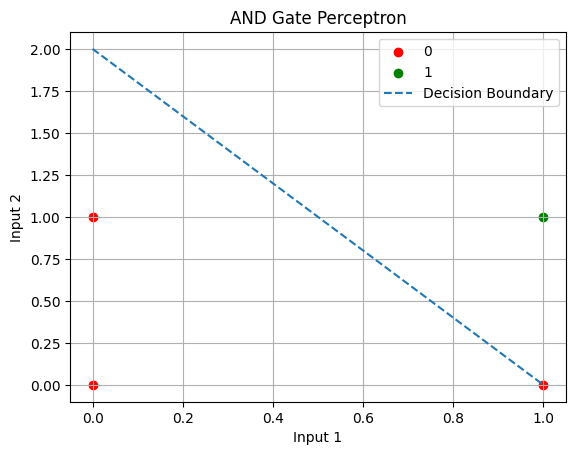

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Input and Output for AND gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
learning_rate = 0.1
epochs = 10

# Perceptron training
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = 1 if z >= 0 else 0
        error = y[i] - pred
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Trained weights:", weights)
print("Trained bias:", bias)

# Plotting the decision boundary
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', label='0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='green', label='1')

# Decision boundary line: w1*x + w2*y + b = 0
x_vals = np.array([0, 1])
y_vals = -(weights[0] * x_vals + bias) / weights[1]
plt.plot(x_vals, y_vals, label='Decision Boundary', linestyle='--')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('AND Gate Perceptron')
plt.legend()
plt.grid(True)
plt.show()



Trained weights: [-0.1  0.1  0.1]


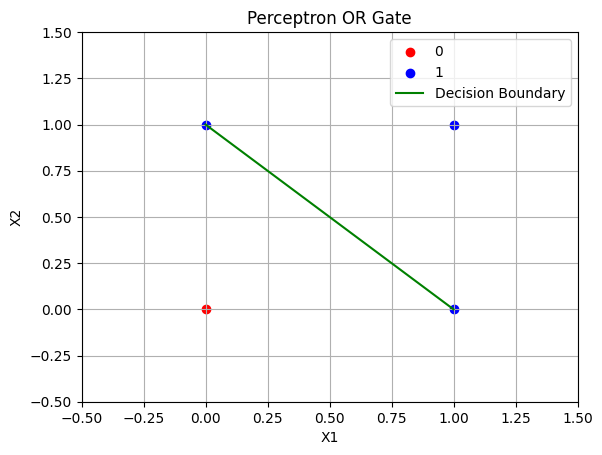

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, ip, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros(ip + 1)  # +1 for bias

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = self.weights.T.dot(x)
        return self.activation_fn(z)

    def fit(self, X, Y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Add bias input = 1
                y_pred = self.predict(x_i)
                error = Y[i] - y_pred
                self.weights = self.weights + self.lr * error * x_i

if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    Y = np.array([0, 1, 1, 1])  # OR gate

    model = Perceptron(ip=2, lr=0.1, epochs=100)
    model.fit(X, Y)

    print("Trained weights:", model.weights)

    # Plotting
    for i in range(len(X)):
        if Y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color='red', label='0' if i == 0 else "")
        else:
            plt.scatter(X[i][0], X[i][1], color='blue', label='1' if i == 1 else "")

    # Decision boundary: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
    x_vals = np.array([0, 1])
    w = model.weights
    if w[2] != 0:
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        plt.plot(x_vals, y_vals, label='Decision Boundary', color='green')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Perceptron OR Gate")
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()
